# Installation du connecteur à Snowflake

In [43]:
# pip install --upgrade snowflake-connector-python


# CONNECTION A SNOWFLAKE

In [44]:
# import snowflake.connector
# from dotenv import load_dotenv
# import os 
# load_dotenv()

In [45]:
# snow_paswword = os.environ["SNOWFLAKE_PASSWORD"]

# conn = snowflake.connector.connect(
#     user="PAGETO",
#     password=snow_paswword,
#     account="IOXBEAF-ER47153"
#     )

# CONNECTION A MA DATABASE "ANALYTICS" SUR SNOWFLAKE

In [46]:
# conn.cursor().execute("USE DATABASE ANALYTICS")

In [47]:
# conn.cursor().execute("USE SCHEMA DBT_PPAGET")

# IMPORT DE MES VIEWS STAGING

In [48]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 


In [49]:
#Je passe en commentaire car ma connexion à snowflake a expirée avec la fin de la période d'essai
# stg_flight_summary_data = conn.cursor().execute("SELECT * FROM stg_flight_summary_data").fetch_pandas_all()
# stg_flight_summary_data.head()

In [50]:
# stg_individual_flights = conn.cursor().execute("SELECT * FROM stg_individual_flights").fetch_pandas_all()
# stg_individual_flights.head()

In [51]:
#Je télécharge mes views staging en format .csv afin de pouvoir les ré-importer quand Snowflake et DBT auront atteint la fin de leur période d'essai et que, de fait, les données ne seront plus connectées
# stg_flight_summary_data.to_csv("stg_flight_summary_data.csv",index=False)
# stg_individual_flights.to_csv("stg_individual_flights.csv",index=False)

In [52]:
#J'importe ma view enregistrée en local sur un .csv car ma connexion à snowflake a expirée avec la fin de la période d'essai
stg_flight_summary_data = pd.read_csv("stg_flight_summary_data.csv")
stg_flight_summary_data.head()

,index,DATE,ASM_DOMESTIC,ASM_INTERNATIONAL,FLIGHTS_DOMESTIC,FLIGHTS_INTERNATIONAL,PASSENGERS_DOMESTIC,PASSENGERS_INTERNATIONAL,RPM_DOMESTIC,RPM_INTERNATIONAL,AIRLINE_CODE,AIRPORT_CODE
0,0,2002-10-01,59854,0.0,774,0.0,60464,59.0,38363,0.0,FA,FKT
1,1,2002-11-01,55009,0.0,733,0.0,57649,0.0,36286,0.0,FA,FKT
2,2,2002-12-01,56586,0.0,745,0.0,66240,0.0,41907,0.0,FA,FKT
3,3,2003-01-01,57448,0.0,754,0.0,55317,4.0,35118,0.0,FA,FKT
4,4,2003-02-01,54006,0.0,674,0.0,53216,65.0,33724,0.0,FA,FKT


In [53]:
stg_individual_flights = pd.read_csv("stg_individual_flights.csv")
stg_individual_flights.head()

,FLIGHT_ID,AIRLINE_CODE,DEPARTURE_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,AIRCRAFT_ID
0,100001,FA,FKT,NSA,12d
1,100002,FA,FKT,NSA,12d
2,100003,FA,FKT,NSA,12d
3,100004,FA,FKT,NSA,12d
4,100005,FA,FKT,NSA,12d


# IMPORT DE MES TABLES DIMENSIONS

In [54]:
# dim_aircrafts = conn.cursor().execute("SELECT * FROM dim_aircrafts").fetch_pandas_all()
# dim_aircrafts

In [55]:
# dim_airlines = conn.cursor().execute("SELECT * FROM dim_airlines").fetch_pandas_all()
# dim_airlines

In [56]:
# dim_airports = conn.cursor().execute("SELECT * FROM dim_airports").fetch_pandas_all()
# dim_airports

In [57]:
#Je télécharge mes tables dimensions en format .csv afin de pouvoir les ré-importer quand Snowflake et DBT auront atteint la fin de leur période d'essai et que, de fait, les données ne seront plus connectées
# dim_aircrafts.to_csv("dim_aircrafts.csv",index=False)
# dim_airlines.to_csv("dim_airlines.csv",index=False)
# dim_airports.to_csv("dim_airports.csv",index=False)


In [58]:
dim_aircrafts = pd.read_csv("dim_aircrafts.csv")
dim_aircrafts

,AIRCRAFT_ID,AIRCRAFT_TYPE,MASS,LENGHT,COST,CAPACITY
0,12d,Flockinator,1000000,10000,100000000,1000
1,12a,Miniflock,50000,2000,2000000,200
2,g72,Goose,200000,5000,3000000,500
3,t10,Thundercat,1500000,20000,400000000,2000
4,b23,Bezantium,4000000,100000,1000000000,5000


In [59]:
dim_airlines = pd.read_csv("dim_airlines.csv")
dim_airlines

,AIRLINE_CODE,AIRLINE_NAME,MARKET_CAP,EMPLOYEES,AGE
0,FA,Flock Air,1000000000,2000000,10
1,GA,Goose Airways,50000000,30000,6
2,AA,Amazon Airlines,2000000000,10000000,22


In [60]:
dim_airports = pd.read_csv("dim_airports.csv")
dim_airports

,AIRPORT_CODE,AIRPORT_NAME,AIRPORT_EMPLOYEES,AIRPORT_SIZE
0,FKT,Flocktopia,1000000,2000000
1,NSA,Nestland Airport,20000,50000
2,AMP,Amazon Mothership,100000,10000


# IMPORT DE MES TABLES FACTS

In [61]:
# fct_aircrafts = conn.cursor().execute("SELECT * FROM fct_aircrafts ORDER BY NB_FLIGHTS DESC").fetch_pandas_all()
# fct_aircrafts

In [62]:
# fct_airlines = conn.cursor().execute("SELECT * FROM fct_airlines").fetch_pandas_all()
# fct_airlines

In [63]:
# fct_airports = conn.cursor().execute("SELECT * FROM fct_airports").fetch_pandas_all()
# fct_airports

In [64]:
# fct_capacity = conn.cursor().execute("SELECT * FROM fct_capacity ORDER BY AIRPORT_CAPACITY DESC").fetch_pandas_all()
# fct_capacity

In [65]:
# fct_croissance = conn.cursor().execute("SELECT * FROM fct_croissance").fetch_pandas_all().sort_values('BEST_TAUX_CROISSANCE')
# fct_croissance

In [66]:
# fct_croissance_all_years = conn.cursor().execute("SELECT * FROM fct_croissance_all_years").fetch_pandas_all()
# fct_croissance_all_years.head()

In [67]:
#Je télécharge mes tables facts en format .csv afin de pouvoir les ré-importer quand Snowflake et DBT auront atteint la fin de leur période d'essai et que, de fait, les données ne seront plus connectées
# fct_aircrafts.to_csv("fct_aircrafts.csv",index=False)

# fct_airlines.to_csv("fct_airlines.csv",index=False)

# fct_airports.to_csv("fct_airports.csv",index=False)

# fct_capacity.to_csv("fct_capacity.csv",index=False)

# fct_croissance.to_csv("fct_croissance.csv",index=False)

# fct_croissance_all_years.to_csv("fct_croissance_all_years.csv",index=False)

In [68]:
sns.set_theme(style="whitegrid")

In [69]:
fct_aircrafts = pd.read_csv("fct_aircrafts.csv")
fct_aircrafts

,AIRCRAFT_ID,AIRCRAFT_TYPE,NB_FLIGHTS
0,g72,Goose,1008
1,t10,Thundercat,553
2,12a,Miniflock,277
3,b23,Bezantium,240
4,12d,Flockinator,192


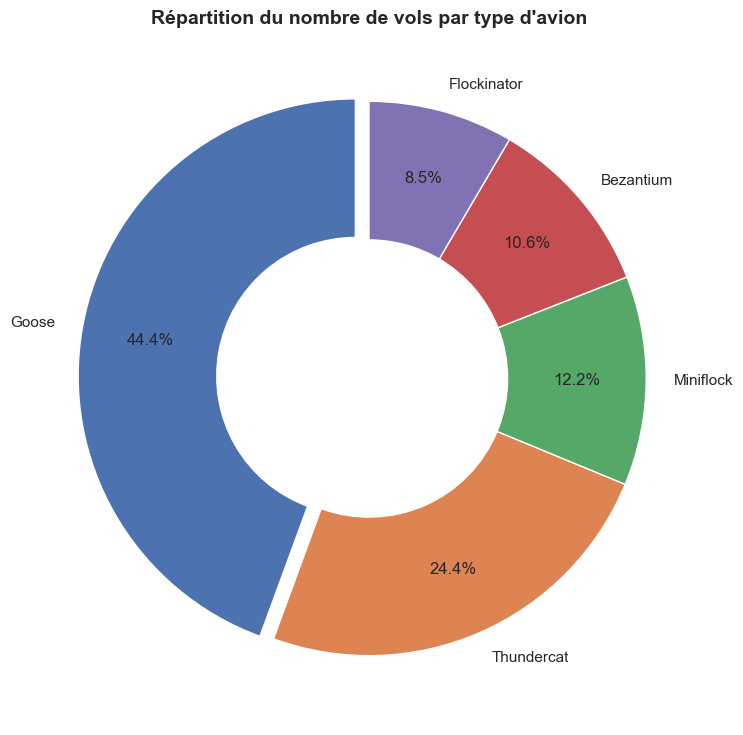

In [70]:
explode = (0.05,0,0,0,0)

plt.figure(figsize=(9,9))


plt.pie(fct_aircrafts["NB_FLIGHTS"],
        labels=fct_aircrafts["AIRCRAFT_TYPE"],
        autopct='%0.1f%%',
        pctdistance=0.75,
        wedgeprops=dict(width=0.5),
        startangle=90,
        explode=explode)



plt.title("Répartition du nombre de vols par type d'avion", fontsize=14, fontweight='bold')
plt.show()


La répartition des vols montre une forte domination du modèle Goose, qui représente à lui seul 44 % de l’ensemble des vols. Il est suivi par le Thundercat (24 %), puis les modèles Miniflock (12 %), Bezantium (11 %) et Flockinator (8 %). 

Cette distribution indique que la flotte repose largement sur le modèle Goose, suggérant qu’il s’agit soit du modèle le plus disponible, soit du plus sollicité en opération. Les autres appareils ont une contribution plus équilibrée, mais nettement moindre.


In [71]:
fct_airports = pd.read_csv("fct_airports.csv")
fct_airports

,AIRPORT_CODE,AIRPORT_NAME,PASSENGERS_NB
0,FKT,Flocktopia,430959170.0
1,NSA,Nestland Airport,179064722.0
2,AMP,Amazon Mothership,80033991.0


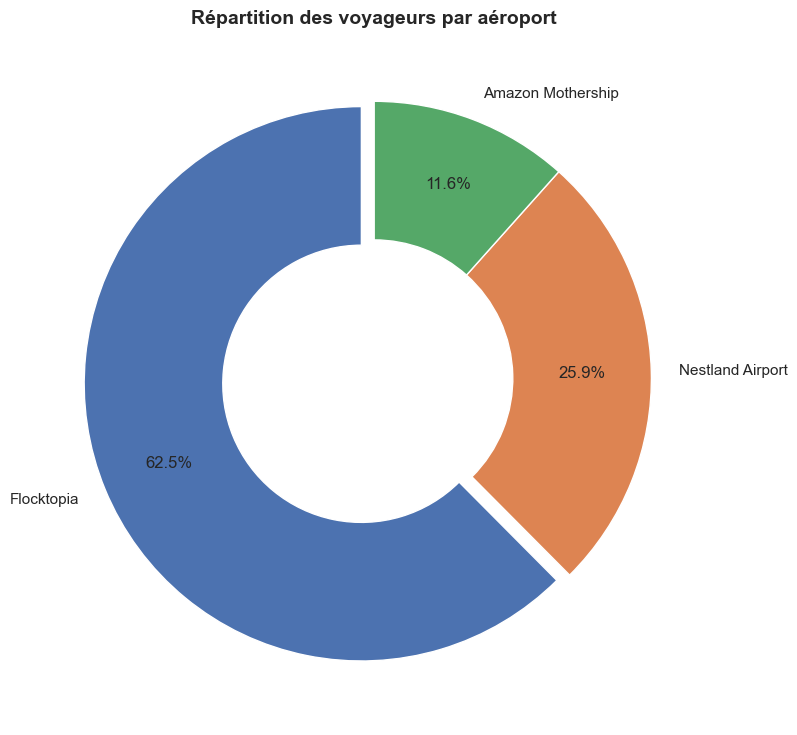

In [72]:
explode = (0.05,0,0)

plt.figure(figsize=(9,9))


plt.pie(fct_airports["PASSENGERS_NB"],
        labels=fct_airports["AIRPORT_NAME"],
        autopct='%0.1f%%',
        pctdistance=0.75,
        wedgeprops=dict(width=0.5),
        startangle=90,
        explode=explode)



plt.title("Répartition des voyageurs par aéroport", fontsize=14, fontweight='bold')
plt.show()

Le graphique montre une forte concentration du trafic à Flocktopia (62 %), suivie de Nestland Airport (26 %) et d’Amazon Mothership (12 %). La répartition est donc clairement dominée par un seul aéroport.

Cette dominance suggère d’investir en priorité dans Flocktopia pour soutenir son rôle central, tout en envisageant un rééquilibrage du trafic afin de réduire la dépendance opérationnelle et d’améliorer la performance des deux autres aéroports.


In [73]:
fct_airlines = pd.read_csv("fct_airlines.csv")
fct_airlines

,AIRLINE_CODE,AIRLINE_NAME,YEAR,REVENUE,METRIC
0,AA,Amazon Airlines,2015,9175044.0,domestic
1,FA,Flock Air,2016,13405774.0,domestic
2,GA,Goose Airways,2016,34637841.0,domestic
3,AA,Amazon Airlines,2016,2792855.0,international
4,FA,Flock Air,2016,3912894.0,international
5,GA,Goose Airways,2015,15219579.0,international
6,AA,Amazon Airlines,2015,11912594.0,total
7,FA,Flock Air,2016,17318668.0,total
8,GA,Goose Airways,2016,49260222.0,total


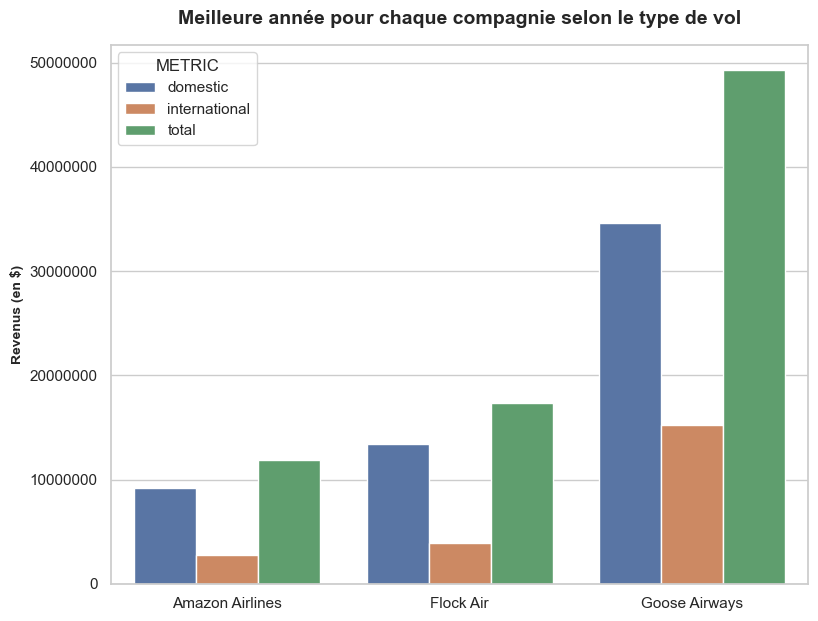

In [74]:
# Sur le graphique ci-dessous n'apparaissent pas les années pour chaque colonne. Je décide donc de passer par un plotly express (voir graphique d'après)

plt.figure(figsize=(9,7))

ax = sns.barplot(data=fct_airlines,
            x="AIRLINE_NAME",
            y="REVENUE",
            hue="METRIC")


plt.ticklabel_format(style='plain', axis='y')
plt.title("Meilleure année pour chaque compagnie selon le type de vol", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("")
plt.ylabel('Revenus (en $)', fontsize=10 , fontweight='bold')
plt.show()

In [75]:
fig = px.bar(
    fct_airlines,
    x="AIRLINE_NAME",
    y="REVENUE",
    color="METRIC",
    barmode="group",
    text="YEAR"       # ← Ajoute l’année sur chaque barre
)

# Style : placer le texte AU-DESSUS des barres
fig.update_traces(
    textposition="outside",
    textfont_size=12
)


fig.update_layout(go.Layout(
    title=go.layout.Title(
        text="<b>Meilleure année pour chaque compagnie selon le type de vol</b>",
        x=0.5,
        y=0.97,
        font=dict(
            size = 18,
            color="black"
        )
    )
))

fig.update_layout(
    xaxis_title=""
    )

fig.update_layout(
    width=1000,
    height=800
)
fig.show()

Goose Airways génère clairement le plus de revenus, devant Flock Air, tandis qu’Amazon Airlines reste loin derrière. Pour chaque compagnie, l’année indiquée correspond à leur meilleur niveau selon le type de trafic.

Goose Airways apparaît comme la compagnie à privilégier pour renforcer les collaborations. Flock Air montre un potentiel intéressant à développer. Amazon Airlines nécessite plutôt une optimisation ou un repositionnement stratégique. Les différences entre revenus domestiques et internationaux permettent aussi d’affiner les actions selon chaque marché

In [76]:
fct_croissance_all_years = pd.read_csv("fct_croissance_all_years.csv")
fct_croissance_all_years.head()

,AIRLINE_CODE,AIRLINE_NAME,YEAR,AVG_ASM_DOMESTIC,PREVIOUS_YEAR,TAUX_CROISSANCE
0,AA,Amazon Airlines,2002,315931.000000,NaN,NaN
1,AA,Amazon Airlines,2003,295645.527778,315931.000000,-6.42
2,AA,Amazon Airlines,2004,296641.388889,295645.527778,0.34
3,AA,Amazon Airlines,2005,255289.083333,296641.388889,-13.94
4,AA,Amazon Airlines,2006,270788.361111,255289.083333,6.07


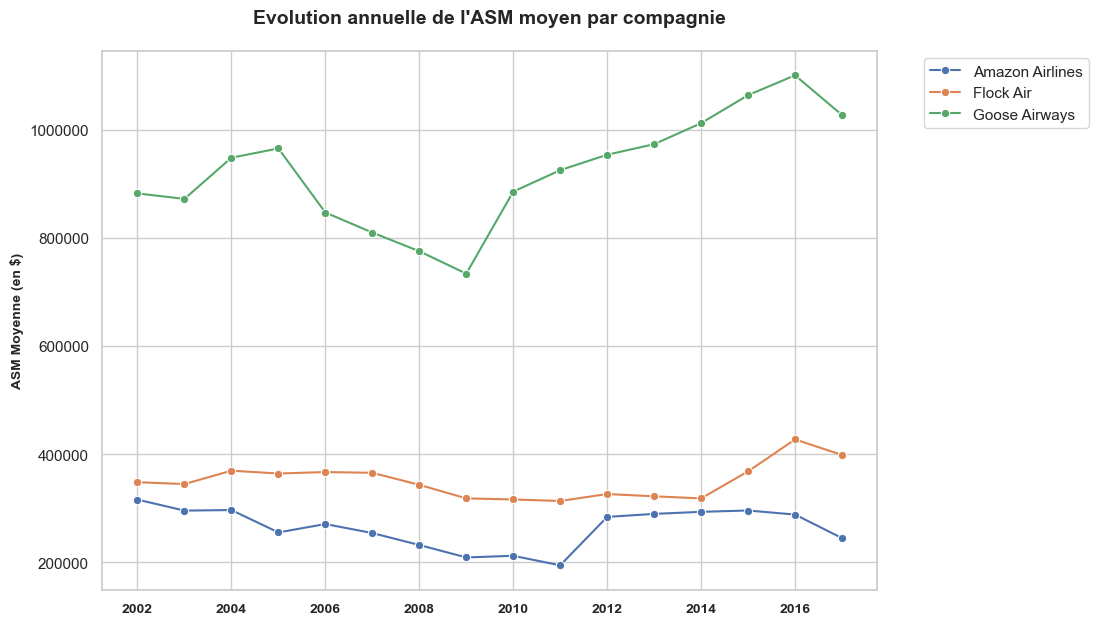

In [77]:
plt.figure(figsize=(10,7))

sns.lineplot(data=fct_croissance_all_years,
            x='YEAR',
            y='AVG_ASM_DOMESTIC',
            hue='AIRLINE_NAME',
            marker='o',
            errorbar=None)     #Me permets de retirer l'aire autour de la courbe (représentant la marge d'erreur)
plt.ylabel('ASM Moyenne (en $)', fontsize=10 , fontweight='bold')
plt.xlabel('')
plt.xticks(ha='center', fontsize=10 , fontweight='bold')
plt.title("Evolution annuelle de l'ASM moyen par compagnie", fontsize='14', fontweight='bold', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Le graphique montre l’évolution de l’ASM moyen (Available Seat Miles) pour trois compagnies aériennes entre 2002 et 2017.

On observe clairement que Goose Airways domine largement le marché en termes de capacité, avec une tendance globalement haussière malgré quelques fluctuations (notamment un creux autour de 2009 suivi d’une forte reprise).

Flock Air, quant à elle, maintient une capacité intermédiaire et relativement stable au fil des années, avec une légère hausse en fin de période.

Enfin, Amazon Airlines affiche les niveaux d’ASM les plus faibles, avec une baisse progressive jusqu’en 2010, suivie d’une remontée modérée mais insuffisante pour rattraper les concurrents.

Globalement, la période montre une intensification de l’activité pour Goose Airways, une stabilité pour Flock Air, et une fragilité structurelle pour Amazon Airlines.

Du point de vue stratégique, ces tendances suggèrent plusieurs implications pour les décideurs :
#### Goose Airways
  - Sa croissance continue en ASM indique une augmentation de l’offre et de la capacité, ce qui peut être le signe d’une stratégie d’expansion agressive.
  - Si la demande suit la même dynamique, Goose Airways est bien positionnée pour consolider sa part de marché.
  - Toutefois, les pics et fluctuations observés suggèrent de surveiller l’optimisation du remplissage afin d’éviter des capacités excédentaires.

 #### Flock Air
 - Sa relative stabilité montre une stratégie plus prudente, mais cohérente.
 - La hausse récente pourrait indiquer une volonté d’investir ou d’élargir certains segments.
 - Une analyse fine des routes les plus rentables pourrait permettre à la compagnie de stimuler la croissance sans prendre de risques excessifs.
 
 #### Amazon Airlines
 - La baisse initiale puis la progression modérée signalent une entreprise peut-être en repositionnement ou en difficulté opérationnelle.
 - Amazon Airlines pourrait devoir repenser son réseau, optimiser sa flotte ou cibler des niches pour rester compétitive.
 - Les niveaux d’ASM très inférieurs aux concurrents en font un acteur à la capacité limitée : pour croître, il serait pertinent d’envisager des partenariats, un repositionnement de marché ou un investissement dans la flotte.

 #### Synthèse
 Le graphique met en évidence un marché où Goose Airways s’impose comme leader en capacité, Flock Air adopte un positionnement stable, et Amazon Airlines semble en retrait. D'un point de vue business, ces courbes appellent à des stratégies différenciées :
- consolidation et optimisation pour Goose Airways
- croissance maîtrisée pour Flock Air
- restructuration stratégique pour Amazon Airlines.


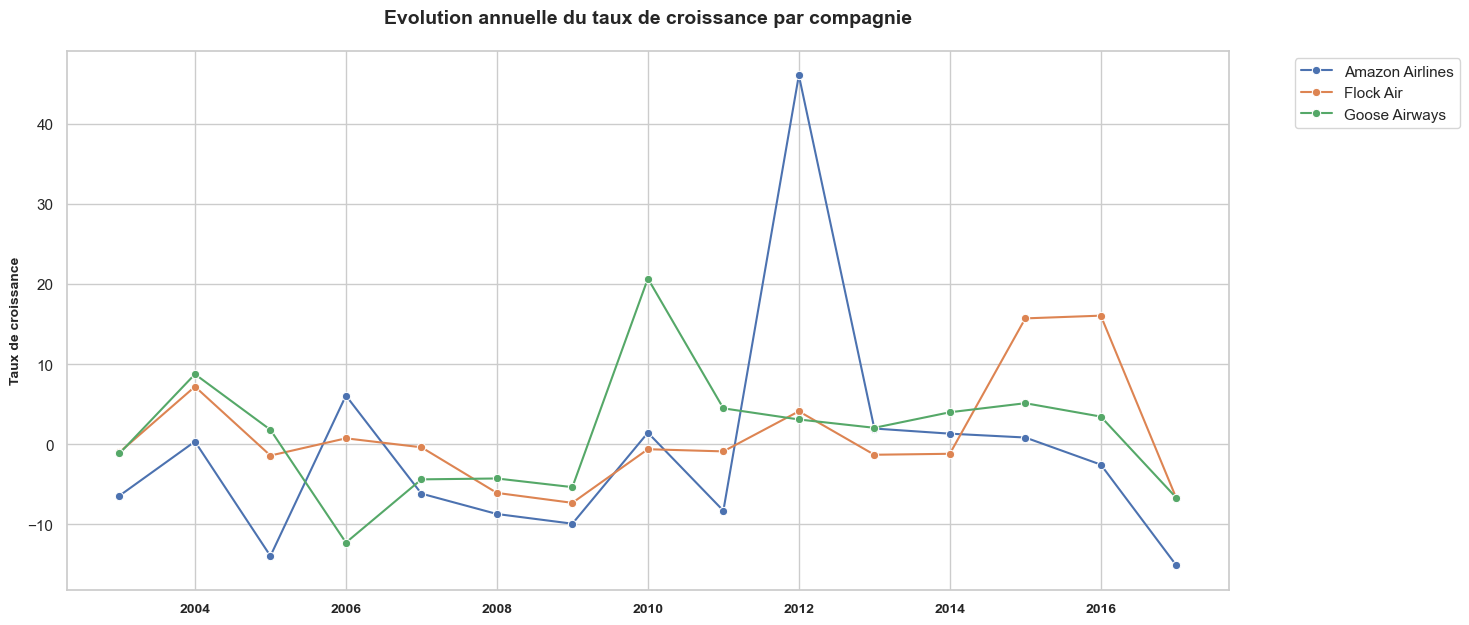

In [78]:
plt.figure(figsize=(15,7))

sns.lineplot(data=fct_croissance_all_years,
            x='YEAR',
            y='TAUX_CROISSANCE',
            hue='AIRLINE_NAME',
            marker='o',
            errorbar=None)     #Me permets de retirer l'aire autour de la courbe (représentant la marge d'erreur)
plt.ylabel('Taux de croissance', fontsize=10 , fontweight='bold')
plt.xlabel('')
plt.xticks(ha='center', fontsize=10 , fontweight='bold')
plt.title("Evolution annuelle du taux de croissance par compagnie", fontsize='14', fontweight='bold', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Le graphique montre que les trois compagnies connaissent des taux de croissance très volatils au fil des années.
Amazon Airlines affiche les variations les plus extrêmes, notamment un pic exceptionnel autour de 2012 suivi d’une chute rapide. Flock Air présente une croissance globalement faible mais plus stable, avec un rebond notable en 2015–2016. Goose Airways oscille régulièrement entre phases positives et négatives, avec quelques hausses marquées comme en 2010.

La forte volatilité d’Amazon Airlines suggère un modèle instable : la compagnie aurait intérêt à stabiliser son réseau et à mieux anticiper ses ajustements de capacité. Flock Air, plus régulière, pourrait capitaliser sur cette stabilité pour améliorer progressivement ses performances en ciblant des segments rentables. Goose Airways, alternant phases de croissance et de recul, gagnerait à mieux lisser sa stratégie de déploiement afin de limiter les années négatives et sécuriser sa position sur le long terme

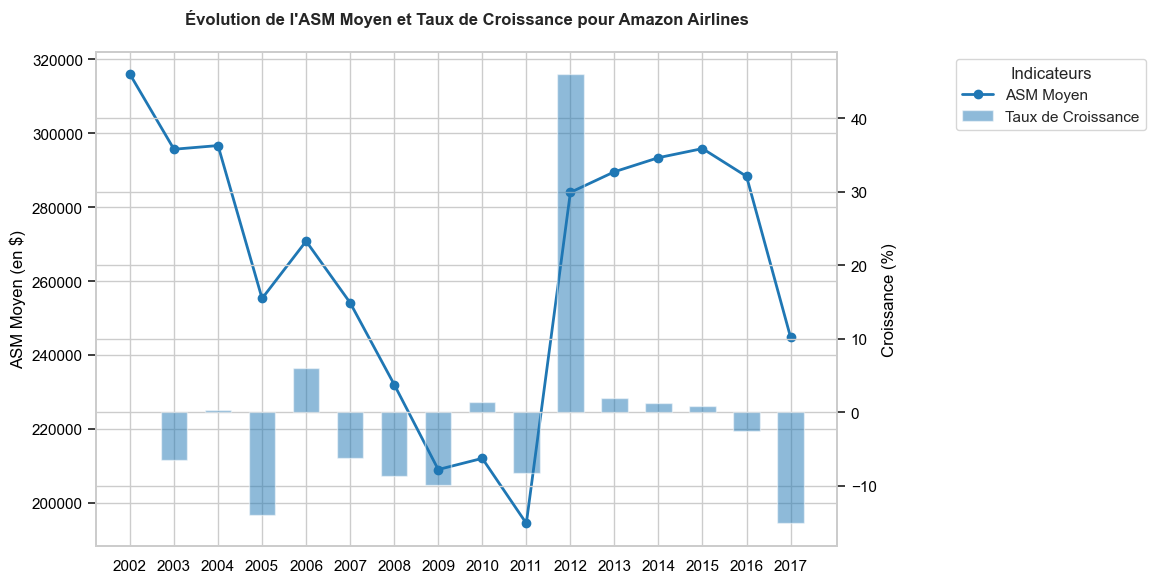

In [79]:
# --- ÉTAPE 1 : FILTRAGE DU DATAFRAME (Nouveau) ---
# Assurez-vous que votre DataFrame 'fct_croissance_all_years' est chargé ici.
# Cette ligne crée un nouveau DataFrame qui ne contient que les données de la compagnie désirée.
NOM_COMPAGNIE = 'Amazon Airlines'
df_amazon = fct_croissance_all_years[fct_croissance_all_years['AIRLINE_NAME'] == NOM_COMPAGNIE].copy()


# --- 0. APPLICATION DU THÈME SEABORN ---
sns.set_theme(style="whitegrid") 
COULEUR_PRINCIPALE = 'tab:blue' 
TITRE_PRINCIPAL = f"Évolution de l'ASM Moyen et Taux de Croissance pour {NOM_COMPAGNIE}"

# Les positions numériques pour l'axe X (basées sur le DataFrame filtré !)
x = np.arange(len(df_amazon['YEAR'])) 
largeur_barre = 0.6

# --- 1. Initialisation du Graphique et de l'Axe Principal (ASM) ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Tracé 1 : Courbe de l'ASM (Axe Y Gauche) ---
# COULEUR PRINCIPALE avec alpha=0.5
ax1.plot(x, df_amazon['AVG_ASM_DOMESTIC'], color=COULEUR_PRINCIPALE, 
         marker='o', linestyle='-', linewidth=2, 
         alpha=1, 
         label='ASM Moyen') 

# Titre de l'axe Y gauche en NOIR
ax1.set_ylabel('ASM Moyen (en $)', color='black') 
# Graduations de l'axe Y gauche en NOIR
ax1.tick_params(axis='y', labelcolor='black') 
ax1.ticklabel_format(style='plain', axis='y')


# --- 2. Création de l'Axe Jumeau pour la Croissance ---
ax2 = ax1.twinx() 

# --- Tracé 2 : Barres de Croissance (Axe Y Droit) ---
# COULEUR PRINCIPALE sans transparence
ax2.bar(x, df_amazon['TAUX_CROISSANCE'], color=COULEUR_PRINCIPALE, 
        alpha=0.5, 
        width=largeur_barre, 
        label='Taux de Croissance')

# Titre de l'axe Y droit en NOIR
ax2.set_ylabel('Croissance (%)', color='black') 
# Graduations de l'axe Y droit en NOIR
ax2.tick_params(axis='y', labelcolor='black') 


# --- 3. Configuration des Axes X et du Titre ---
# Graduations de l'axe X en NOIR
ax1.tick_params(axis='x', labelcolor='black') 
ax1.set_xticks(x)
ax1.set_xticklabels(df_amazon['YEAR']) 

# Titre de l'axe X en NOIR
ax1.set_xlabel('') 


# Titre principal en GRAS avec espacement
plt.title(TITRE_PRINCIPAL, 
          fontweight='bold', # <--- Mise en gras
          pad=20)            # <--- Ajout d'un espace de 20 points sous le titre


# --- 4. GESTION ET PLACEMENT DE LA LÉGENDE ---
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(h1+h2, l1+l2, 
           loc='upper left',          
           bbox_to_anchor=(1.15, 1.0), 
           frameon=True,              
           title="Indicateurs")

fig.tight_layout() 

# Afficher le graphique
plt.show()

Amazon Airlines a traversé une décennie de récession prolongée (2002–2011), avant d'afficher un rebond spectaculaire mais isolé en 2012 qui n'a pas pu être maintenu.

- Récession et crise (2002–2011) : L'ASM Moyen chute de manière significative, avec des taux de croissance faibles, quasiment toujours négétifs, marquant une recession profonde dans le temps.
- Rebond et Pic (2012) : Amazon Airlines connaît un rebond exceptionnel en 2012, propulsé par un taux de croissance record de +48,8%. L'ASM Moyen atteint alors son pic historique.
- Période post-pic (2013–2017) : Malgré le pic de 2012, la croissance s'est normalisée à un niveau très faible (inférieur à +2,5%) avant de connaître une contraction nette en 2017 avec un taux de croissance fortement négatif (-16,7%) et une chute de l'ASM Moyen.

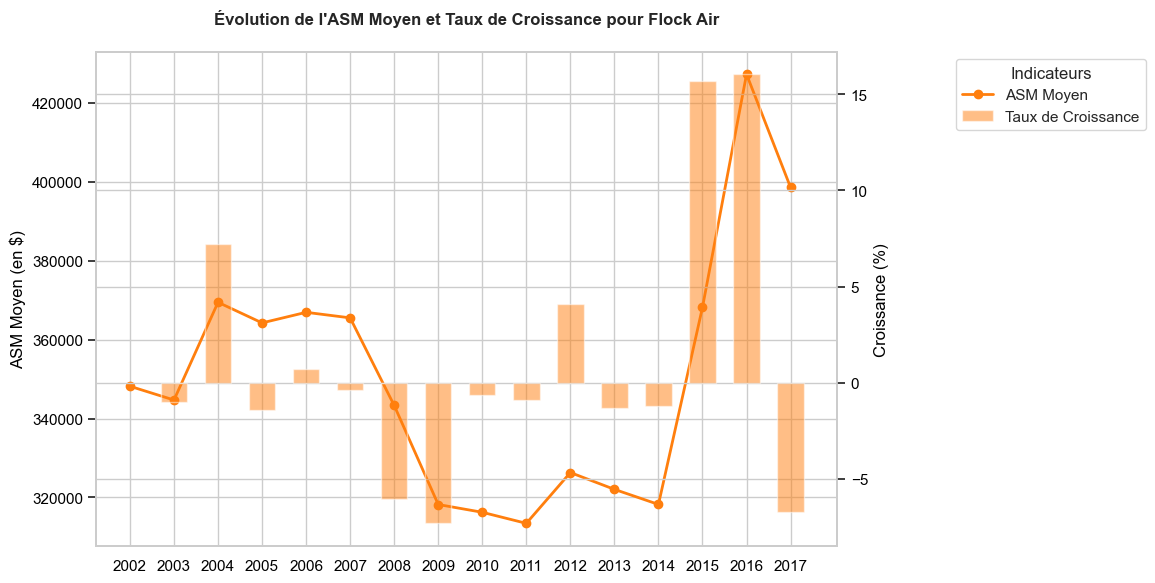

In [80]:
# --- ÉTAPE 1 : FILTRAGE DU DATAFRAME (Nouveau) ---
# Assurez-vous que votre DataFrame 'fct_croissance_all_years' est chargé ici.
# Cette ligne crée un nouveau DataFrame qui ne contient que les données de la compagnie désirée.
NOM_COMPAGNIE = 'Flock Air'
df_flockair = fct_croissance_all_years[fct_croissance_all_years['AIRLINE_NAME'] == NOM_COMPAGNIE].copy()


# --- 0. APPLICATION DU THÈME SEABORN ---
sns.set_theme(style="whitegrid") 
COULEUR_PRINCIPALE = 'tab:orange' 
TITRE_PRINCIPAL = f"Évolution de l'ASM Moyen et Taux de Croissance pour {NOM_COMPAGNIE}"

# Les positions numériques pour l'axe X (basées sur le DataFrame filtré !)
x = np.arange(len(df_flockair['YEAR'])) 
largeur_barre = 0.6

# --- 1. Initialisation du Graphique et de l'Axe Principal (ASM) ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Tracé 1 : Courbe de l'ASM (Axe Y Gauche) ---
# COULEUR PRINCIPALE avec alpha=0.5
ax1.plot(x, df_flockair['AVG_ASM_DOMESTIC'], color=COULEUR_PRINCIPALE, 
         marker='o', linestyle='-', linewidth=2, 
         alpha=1, 
         label='ASM Moyen') 

# Titre de l'axe Y gauche en NOIR
ax1.set_ylabel('ASM Moyen (en $)', color='black') 
# Graduations de l'axe Y gauche en NOIR
ax1.tick_params(axis='y', labelcolor='black') 
ax1.ticklabel_format(style='plain', axis='y')


# --- 2. Création de l'Axe Jumeau pour la Croissance ---
ax2 = ax1.twinx() 

# --- Tracé 2 : Barres de Croissance (Axe Y Droit) ---
# COULEUR PRINCIPALE sans transparence
ax2.bar(x, df_flockair['TAUX_CROISSANCE'], color=COULEUR_PRINCIPALE, 
        alpha=0.5, 
        width=largeur_barre, 
        label='Taux de Croissance')

# Titre de l'axe Y droit en NOIR
ax2.set_ylabel('Croissance (%)', color='black') 
# Graduations de l'axe Y droit en NOIR
ax2.tick_params(axis='y', labelcolor='black') 


# --- 3. Configuration des Axes X et du Titre ---
# Graduations de l'axe X en NOIR
ax1.tick_params(axis='x', labelcolor='black') 
ax1.set_xticks(x)
ax1.set_xticklabels(df_flockair['YEAR']) 

# Titre de l'axe X en NOIR
ax1.set_xlabel('') 


# Titre principal en GRAS avec espacement
plt.title(TITRE_PRINCIPAL, 
          fontweight='bold', # <--- Mise en gras
          pad=20)            # <--- Ajout d'un espace de 20 points sous le titre


# --- 4. GESTION ET PLACEMENT DE LA LÉGENDE ---
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(h1+h2, l1+l2, 
           loc='upper left',          
           bbox_to_anchor=(1.15, 1.0), 
           frameon=True,              
           title="Indicateurs")

fig.tight_layout() 

# Afficher le graphique
plt.show()

    Flock Air a traversé deux phases très distinctes :
    - Période de Stagnation et Contraction (2002–2014) : La courbe de l'ASM Moyen est restée relativement plate entre 2004 et 2007. La récession post-2007 a entraîné une chute progressive de l'ASM, atteignant son creux vers 2011, période marquée par des croissances souvent négatives ou proches de zéro (ex: -7,3% en 2009 et +0,6% en 2010). La compagnie a géré sa capacité avec prudence durant cette décennie.

    - Croissance Agressive et Pic Final (2015–2017) : La compagnie a opéré une expansion radicale et tardive : l'ASM Moyen a connu une montée très rapide en 2015 et 2016, propulsée par des taux de croissance historiques (jusqu'à +16,9% en 2016). Cette poussée a mené l'ASM à son pic absolu sur la période étudiée. Malgré la contraction générale du marché en 2017 (croissance à -6,7%), Flock Air conserve une grande partie de ses gains en ASM.

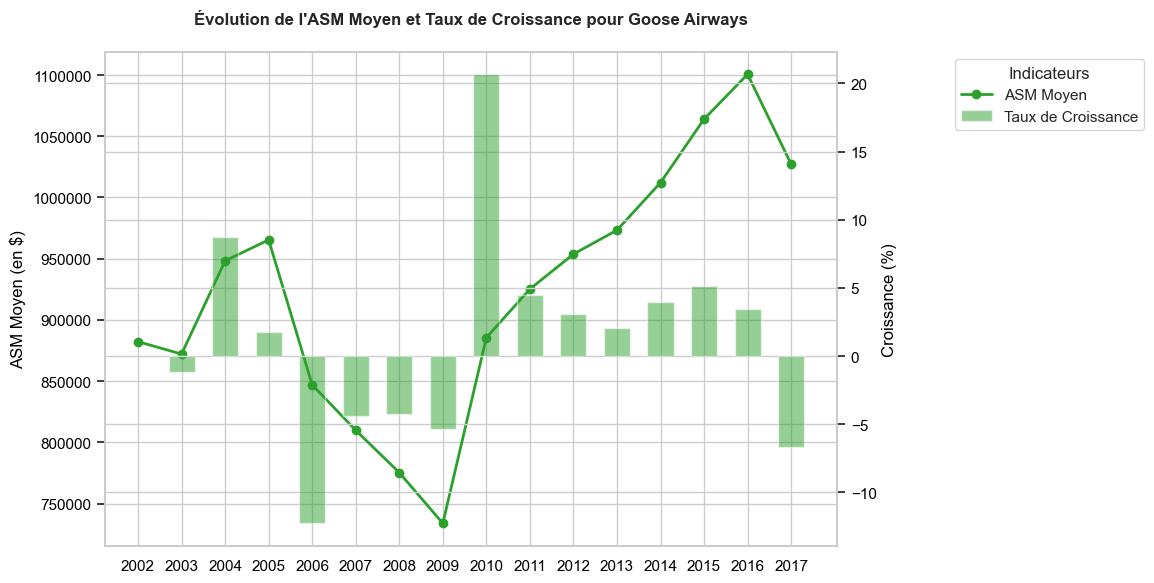

In [81]:
# --- ÉTAPE 1 : FILTRAGE DU DATAFRAME (Nouveau) ---
# Assurez-vous que votre DataFrame 'fct_croissance_all_years' est chargé ici.
# Cette ligne crée un nouveau DataFrame qui ne contient que les données de la compagnie désirée.
NOM_COMPAGNIE = 'Goose Airways'
df_gooseairways = fct_croissance_all_years[fct_croissance_all_years['AIRLINE_NAME'] == NOM_COMPAGNIE].copy()


# --- 0. APPLICATION DU THÈME SEABORN ---
sns.set_theme(style="whitegrid") 
COULEUR_PRINCIPALE = 'tab:green' 
TITRE_PRINCIPAL = f"Évolution de l'ASM Moyen et Taux de Croissance pour {NOM_COMPAGNIE}"

# Les positions numériques pour l'axe X (basées sur le DataFrame filtré !)
x = np.arange(len(df_gooseairways['YEAR'])) 
largeur_barre = 0.6

# --- 1. Initialisation du Graphique et de l'Axe Principal (ASM) ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Tracé 1 : Courbe de l'ASM (Axe Y Gauche) ---
# COULEUR PRINCIPALE avec alpha=0.5
ax1.plot(x, df_gooseairways['AVG_ASM_DOMESTIC'], color=COULEUR_PRINCIPALE, 
         marker='o', linestyle='-', linewidth=2, 
         alpha=1, 
         label='ASM Moyen') 

# Titre de l'axe Y gauche en NOIR
ax1.set_ylabel('ASM Moyen (en $)', color='black') 
# Graduations de l'axe Y gauche en NOIR
ax1.tick_params(axis='y', labelcolor='black') 
ax1.ticklabel_format(style='plain', axis='y')


# --- 2. Création de l'Axe Jumeau pour la Croissance ---
ax2 = ax1.twinx() 

# --- Tracé 2 : Barres de Croissance (Axe Y Droit) ---
# COULEUR PRINCIPALE sans transparence
ax2.bar(x, df_gooseairways['TAUX_CROISSANCE'], color=COULEUR_PRINCIPALE, 
        alpha=0.5, 
        width=largeur_barre, 
        label='Taux de Croissance')

# Titre de l'axe Y droit en NOIR
ax2.set_ylabel('Croissance (%)', color='black') 
# Graduations de l'axe Y droit en NOIR
ax2.tick_params(axis='y', labelcolor='black') 


# --- 3. Configuration des Axes X et du Titre ---
# Graduations de l'axe X en NOIR
ax1.tick_params(axis='x', labelcolor='black') 
ax1.set_xticks(x)
ax1.set_xticklabels(df_gooseairways['YEAR']) 

# Titre de l'axe X en NOIR
ax1.set_xlabel('') 


# Titre principal en GRAS avec espacement
plt.title(TITRE_PRINCIPAL, 
          fontweight='bold', # <--- Mise en gras
          pad=20)            # <--- Ajout d'un espace de 20 points sous le titre


# --- 4. GESTION ET PLACEMENT DE LA LÉGENDE ---
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.legend(h1+h2, l1+l2, 
           loc='upper left',          
           bbox_to_anchor=(1.15, 1.0), 
           frameon=True,              
           title="Indicateurs")

fig.tight_layout() 

# Afficher le graphique
plt.show()

Goose Air présente le profil le plus résilient et performant sur le long terme.

- Chute et Creux de Crise (2002–2009) :La courbe de l'ASM Moyen connaît une chute prononcée à partir de 2005 pour atteindre son creux historique en 2009 (autour de 740 000). Cette descente est marquée par des taux de croissance négatifs modérés mais persistants entre 2007 et 2009 (entre -4,3% et -5,3% annuellement), signalant une contraction contrôlée de la capacité face à la crise.

- Ascension Soutenue et Pic Absolu (2010–2016) :La compagnie opère un redressement immédiat et spectaculaire en 2010 avec une croissance de +20,7%, tirant la courbe vers le haut. Fait clé : l'ASM Moyen s'engage ensuite dans une ascension constante et régulière jusqu'en 2016, maintenue par des taux de croissance positifs et stables chaque année. Cette expansion durable mène la courbe à son sommet absolu (environ 1,1 million)

In [82]:
fct_croissance = pd.read_csv("fct_croissance.csv")
fct_croissance

,AIRLINE_NAME,AIRLINE_CODE,BEST_YEAR,BEST_TAUX_CROISSANCE
0,Flock Air,FA,2016,16.04
1,Goose Airways,GA,2010,20.67
2,Amazon Airlines,AA,2012,46.02


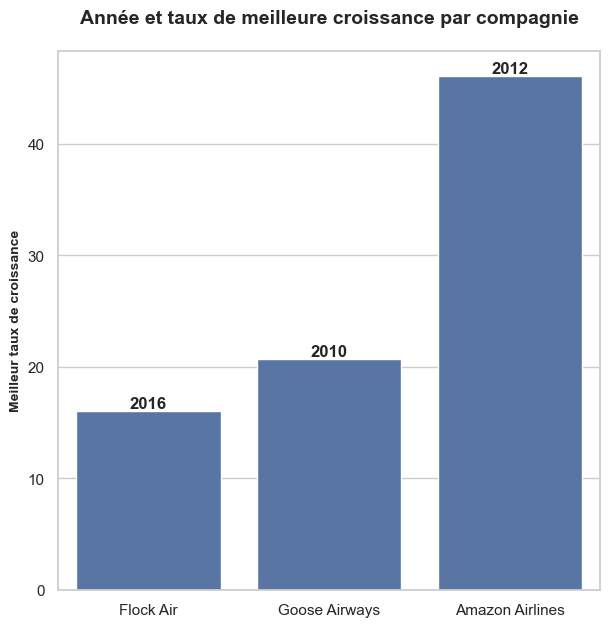

In [83]:
plt.figure(figsize=(7,7))

ax = sns.barplot(data=fct_croissance,
            x="AIRLINE_NAME",
            y="BEST_TAUX_CROISSANCE")
plt.title("Année et taux de meilleure croissance par compagnie", fontsize=14, fontweight='bold',pad=20)
plt.ylabel("Meilleur taux de croissance", fontsize=10, fontweight='bold')
plt.xlabel("")

# --- Ajouter les années sur les barres ---
for i, row in fct_croissance.iterrows():
    x_pos = i
    y_pos = row["BEST_TAUX_CROISSANCE"]
    year = row["BEST_YEAR"]
    
    ax.text(
        x_pos,
        y_pos,
        str(year),      # texte affiché
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.show()

In [84]:
fig = px.bar(
    fct_croissance,
    x="AIRLINE_NAME",
    y="BEST_TAUX_CROISSANCE",
    barmode="group",
    color="AIRLINE_NAME",
    text="BEST_YEAR"       # ← Ajoute l’année sur chaque barre
)

# Style : placer le texte AU-DESSUS des barres
fig.update_traces(
    textposition="outside",
    textfont_size=12
)


fig.update_layout(go.Layout(
    title=go.layout.Title(
        text="<b>Année et taux de meilleure croissance par compagnie</b>",
        x=0.5,
        y=0.97,
        font=dict(
            size = 18,
            color="black"
        )
    )
))

fig.update_layout(
    xaxis_title=""
    )

fig.update_layout(
    yaxis_title="Meilleur taux de croissance"
    )


fig.update_layout(
    width=1000,
    height=800
)
fig.show()

Les deux graphiques montrent que chaque compagnie atteint sa meilleure croissance à une année différente, ce qui souligne des dynamiques propres à chacune. Parallèlement, l’ASM moyen révèle que Goose Airways dispose de loin de la plus grande capacité, tandis que Amazon Airlines et Flock Air restent sur des niveaux plus faibles.

La combinaison de ces deux lectures indique que la capacité n’explique pas à elle seule les pics de croissance :
- Amazon Airlines connaît sa meilleure croissance malgré une faible capacité → un signal fort d’opportunités commerciales à renforcer.
- Goose Airways, très capacitaire, ne transforme pas automatiquement cet avantage en croissance → nécessité d’optimiser sa stratégie.
- Flock Air doit clarifier et stabiliser son positionnement pour consolider ses résultats.

Cette analyse met en évidence l’importance de relier capacité, stratégie et timing pour comprendre et exploiter les leviers de croissance de chaque compagnie.